In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import os
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
df = pd.read_excel("./파이널프로젝트_RAW_210329_210926.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [4]:
df['course_id'].replace('', np.nan, inplace=True)
df['coupon_title'].fillna('사용안함', inplace=True)
df['coupon_discount_amount'].fillna(0.0,inplace=True)
df['sale_price'].replace('', np.nan, inplace=True)
del df['tax_free_amount']
df['pg'].fillna('ETC', inplace=True)
df['subcategory_title'].fillna('해당없음', inplace=True)

df.drop(index=47361, axis=0, inplace=True)
df.dropna(subset=['course_id'], inplace=True)
df.dropna(subset=['sale_price'],inplace=True)

In [5]:
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,사용안함,0.0,110500.0,ETC,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,사용안함,0.0,116000.0,ETC,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,ETC,CARD,해당없음,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,사용안함,0.0,190900.0,ETC,CARD,해당없음,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,ETC,CARD,PPT/보고서,2019-11-14


In [6]:
df = df[df['state']=='COMPLETED']

In [7]:
df = df[(df['type']=='REFUND')|(df['type']=='PAYMENT')]

In [8]:
df.reset_index(drop=True, inplace=True)
temp = df

In [9]:
temp = temp[(temp['format']!='B2B') & (temp['format']!='B2B 온라인') & (temp['format']!='B2G')]

In [10]:
# '데이터사이언스' -> '데이터 사이언스'
temp.loc[temp['category_title']=='데이터사이언스' , 'category_title'] = '데이터 사이언스'

In [11]:
# 카테고리별로 구매까지 완료된 강의 수
compay = temp[(temp['type']=='PAYMENT')&(temp['state']=='COMPLETED')]

In [12]:
pg_pay = compay[compay['category_title']=='프로그래밍']

# 구매 완료된 프로그래밍 카테고리 내의 '해당없음' 결측치 처리
pg_pay.loc[pg_pay['course_title'].str.contains('프론트엔드') , 'subcategory_title'] = '프론트엔드 개발'
pg_pay.loc[pg_pay['course_title'].str.contains('게임') , 'subcategory_title'] = '게임'
pg_pay.loc[pg_pay['course_title'].str.contains('코딩') , 'subcategory_title'] = '코딩 입문'
pg_pay.loc[pg_pay['course_title'].str.contains('개발자') , 'subcategory_title'] = '개발자 커리어'
pg_pay.loc[pg_pay['course_title'].str.contains('데이터') , 'subcategory_title'] = '데이터 사이언스'

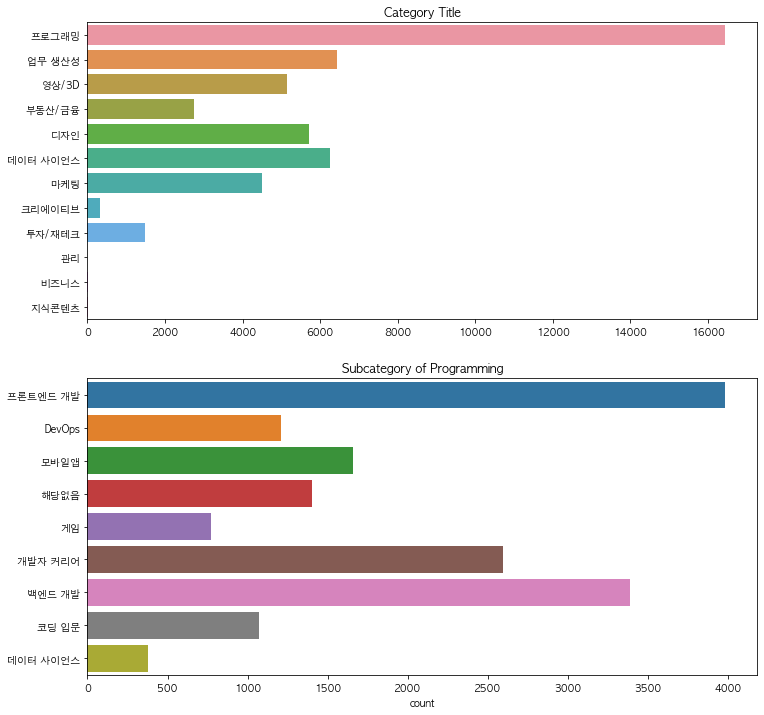

In [13]:
plt.figure(figsize=(12,12))
plt.rc("font", family="AppleGothic")

plt.subplot(2,1,1)
p1 = sns.countplot(data=compay,
                y='category_title')
p1.set_title('Category Title')
p1.set_xlabel('')
p1.set_ylabel('')

plt.subplot(2,1,2)
p2=sns.countplot(data=pg_pay,
                y='subcategory_title')
p2.set_title('Subcategory of Programming')
p2.set_xlabel('count')
p2.set_ylabel('')


plt.show()

In [14]:
# frontend 중에서도 어떤 강의가 많이 구매되었는지 확인
fe = pg_pay[pg_pay['subcategory_title']=='프론트엔드 개발']
fe.reset_index(drop=True)

# frontend 카테고리 컬럼 생성
fe = fe.copy()
fe['frontend_category'] = '프론트엔드 전반'
fe['course_title'].unique()

array(['시크릿코드 : 프론트엔드 실무 완성편', '초격차 패키지 : 한 번에 끝내는 프론트엔드 개발',
       '올인원 패키지 : TypeScript & Angular 실전', '올인원 패키지 : 프론트엔드 (React)',
       '올인원 패키지 : Vue.js 압축 완성', '시크릿 코드 : 프론트엔드 UI 컴포넌트편',
       'The RED : 김민태',
       '올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential',
       '[120일 수강 가능] 초격차 패키지 : 한 번에 끝내는 프론트엔드 개발',
       '네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트', '네카라쿠배 프론트엔드 취업완성 스쿨 2기_2차 테스트',
       'The RED : 견고한 UI 설계를 위한 마크업 가이드 by 정찬명',
       '초격차 패키지 : 한 번에 끝내는 React의 모든 것',
       'The RED : 조은의 프론트엔드 실무 가이드 : 요구사항 분석과 적정 기술'], dtype=object)

In [15]:
# course title에 따른 frontend 카테고리 분류
fe.loc[fe['course_title'].str.contains('React') , 'frontend_category'] = 'React'
fe.loc[fe['course_title'].str.contains('The RED') , 'frontend_category'] = 'The RED'
fe.loc[fe['course_title'].str.contains('js') , 'frontend_category'] = 'JavaScript'
fe.loc[fe['course_title'].str.contains('JavaScript') , 'frontend_category'] = 'JavaScript'
fe.loc[fe['course_title'].str.contains('취업') , 'frontend_category'] = '프론트엔드 취업'
fe.loc[fe['course_title'].str.contains('실무') , 'frontend_category'] = '프론트엔드 실무'
fe.loc[fe['course_title'].str.contains('UI') , 'frontend_category'] = 'UI'

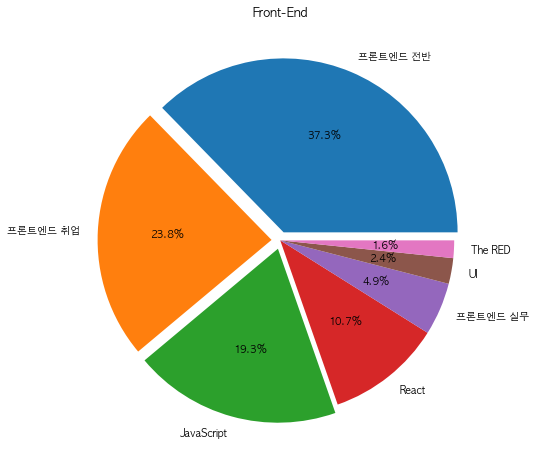

In [16]:
plt.figure(figsize=(12,8))
plt.rc("font", family="AppleGothic")

p1=fe['frontend_category'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0,0,0,0],autopct='%1.1f%%')
p1.set_title('Front-End')
p1.set_ylabel('')

plt.show()

In [17]:
# 환불된 강의 수 확인
ref = temp[(temp['type']=='REFUND')&(temp['state']=='COMPLETED')]

In [ ]:
pg_ref = ref[ref['category_title']=='프로그래밍']

# 환불 완료된 프로그래밍 카테고리 내의 '해당없음' 결측치 처리
pg_ref.loc[pg_ref['course_title'].str.contains('프론트엔드') , 'subcategory_title'] = '프론트엔드 개발'
pg_ref.loc[pg_ref['course_title'].str.contains('게임') , 'subcategory_title'] = '게임'
pg_ref.loc[pg_ref['course_title'].str.contains('코딩') , 'subcategory_title'] = '코딩 입문'
pg_ref.loc[pg_ref['course_title'].str.contains('개발자') , 'subcategory_title'] = '개발자 커리어'
pg_ref.loc[pg_ref['course_title'].str.contains('데이터') , 'subcategory_title'] = '데이터 사이언스'

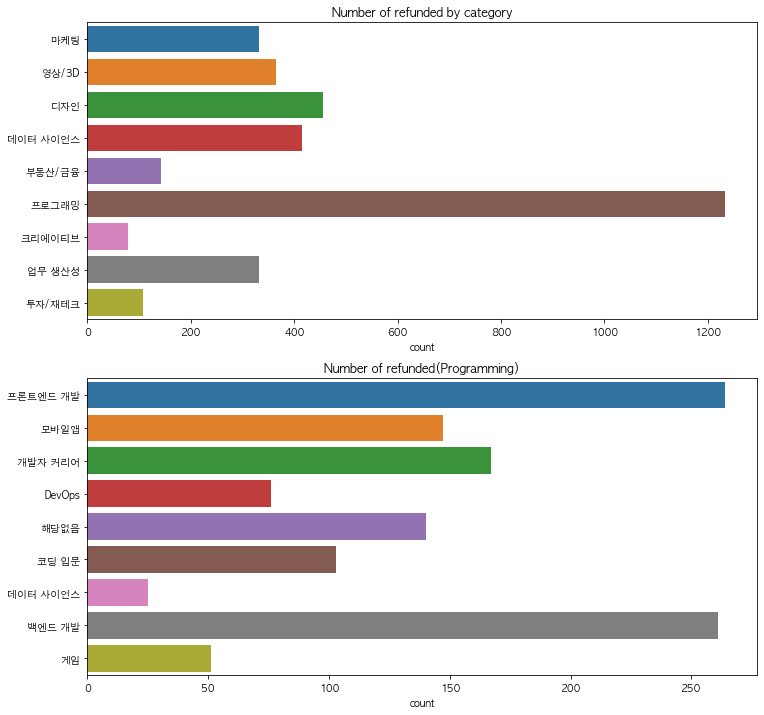

In [36]:
plt.figure(figsize=(12,12))
plt.rc("font", family="AppleGothic")

plt.subplot(2,1,1)
p1=sns.countplot(data=ref,
                y='category_title')
p1.set_title('Number of refunded by category')
p1.set_ylabel('')

plt.subplot(2,1,2)
plt.rc("font", family="AppleGothic")
p1=sns.countplot(data=pg_ref,
                y='subcategory_title')
p1.set_title('Number of refunded(Programming)')
p1.set_ylabel('')


plt.show()

In [28]:
# frontend 중에서도 어떤 강의가 많이 환불되었는지 확인
fe = pg_ref[pg_ref['subcategory_title']=='프론트엔드 개발']
fe.reset_index(drop=True)

# frontend 카테고리 컬럼 생성
fe = fe.copy()
fe['frontend_category'] = '프론트엔드 전반'

# course title에 따른 frontend 카테고리 분류
fe.loc[fe['course_title'].str.contains('React') , 'frontend_category'] = 'React'
fe.loc[fe['course_title'].str.contains('The RED') , 'frontend_category'] = 'The RED'
fe.loc[fe['course_title'].str.contains('js') , 'frontend_category'] = 'JavaScript'
fe.loc[fe['course_title'].str.contains('JavaScript') , 'frontend_category'] = 'JavaScript'
fe.loc[fe['course_title'].str.contains('취업') , 'frontend_category'] = '프론트엔드 취업'
fe.loc[fe['course_title'].str.contains('실무') , 'frontend_category'] = '프론트엔드 실무'
fe.loc[fe['course_title'].str.contains('UI') , 'frontend_category'] = 'UI'

In [31]:
fe['course_title'].unique()

array(['시크릿코드 : 프론트엔드 실무 완성편', '초격차 패키지 : 한 번에 끝내는 프론트엔드 개발',
       '올인원 패키지 : 프론트엔드 (React)',
       '올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential',
       '올인원 패키지 : Vue.js 압축 완성', 'The RED : 김민태',
       '[120일 수강 가능] 초격차 패키지 : 한 번에 끝내는 프론트엔드 개발',
       '시크릿 코드 : 프론트엔드 UI 컴포넌트편', '초격차 패키지 : 한 번에 끝내는 React의 모든 것',
       'The RED : 견고한 UI 설계를 위한 마크업 가이드 by 정찬명',
       '올인원 패키지 : TypeScript & Angular 실전',
       'The RED : 조은의 프론트엔드 실무 가이드 : 요구사항 분석과 적정 기술'], dtype=object)

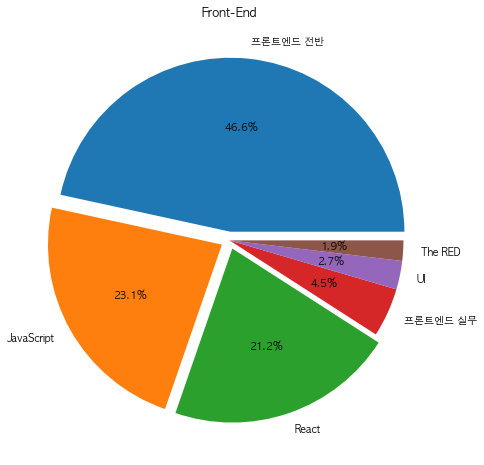

In [33]:
plt.figure(figsize=(12,8))
plt.rc("font", family="AppleGothic")

p1=fe['frontend_category'].value_counts().plot.pie(
    explode=[0.05,0.05,0.05,0,0,0,],
    autopct='%1.1f%%')
p1.set_title('Front-End')
p1.set_ylabel('')

plt.show()

In [39]:
temp[temp['course_title'].str.contains(' 테스트')]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
13491,1062130,523886.0,205237.0,PAYMENT,COMPLETED,네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트,프로그래밍,스쿨,2021-05-10 10:58:57,0,사용안함,0.0,1.0,ETC,PROMOTION,해당없음,2019-04-19
13500,1062160,84972.0,205237.0,PAYMENT,COMPLETED,네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트,프로그래밍,스쿨,2021-05-10 11:11:21,0,사용안함,0.0,1.0,ETC,PROMOTION,해당없음,2019-04-19
13521,1062222,513608.0,205237.0,PAYMENT,COMPLETED,네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트,프로그래밍,스쿨,2021-05-10 11:39:56,0,사용안함,0.0,1.0,ETC,PROMOTION,해당없음,2019-04-19
13525,1062238,438870.0,205237.0,PAYMENT,COMPLETED,네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트,프로그래밍,스쿨,2021-05-10 11:50:03,0,사용안함,0.0,1.0,ETC,PROMOTION,해당없음,2019-04-19
13527,1062248,523942.0,205237.0,PAYMENT,COMPLETED,네카라쿠배 프론트엔드 취업완성 스쿨 2기_1차 테스트,프로그래밍,스쿨,2021-05-10 11:55:30,0,사용안함,0.0,1.0,ETC,PROMOTION,해당없음,2019-04-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43634,1297840,957.0,205205.0,PAYMENT,COMPLETED,"올인원 패키지 : A/B 테스트 탑재, 개인화 마케팅 끝장내기",마케팅,올인원,2021-08-20 08:17:21,124000,사용안함,0.0,124000.0,NAVER,CARD,데이터마케팅,2021-05-21
43948,1299896,45925.0,205205.0,PAYMENT,COMPLETED,"올인원 패키지 : A/B 테스트 탑재, 개인화 마케팅 끝장내기",마케팅,올인원,2021-08-21 15:30:27,124000,사용안함,0.0,124000.0,PAYCO,CARD,데이터마케팅,2021-05-21
45755,1312198,171947.0,205205.0,PAYMENT,COMPLETED,"올인원 패키지 : A/B 테스트 탑재, 개인화 마케팅 끝장내기",마케팅,올인원,2021-08-28 22:29:41,124000,사용안함,0.0,124000.0,INICIS,CARD,데이터마케팅,2021-05-21
46751,1318030,596100.0,205205.0,PAYMENT,COMPLETED,"올인원 패키지 : A/B 테스트 탑재, 개인화 마케팅 끝장내기",마케팅,올인원,2021-08-31 13:08:56,124000,사용안함,0.0,124000.0,INICIS,CARD,데이터마케팅,2021-05-21


In [45]:
temp[(temp['transaction_amount']==0)&(temp['sale_price']==0)]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
